In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

A SHORT DESCRIPTION OF THE FEATURES.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [3]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df=train_data.copy()

In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Now we see all the count values of categorical features like season,workingday,weather,holiday.

In [7]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


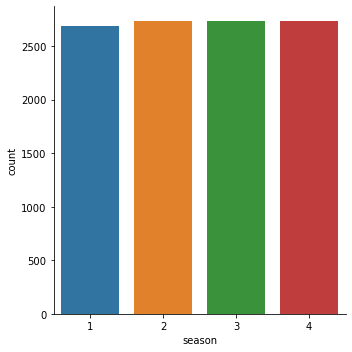

In [8]:
sns.factorplot(x='season',data=df,kind='count')

In [9]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


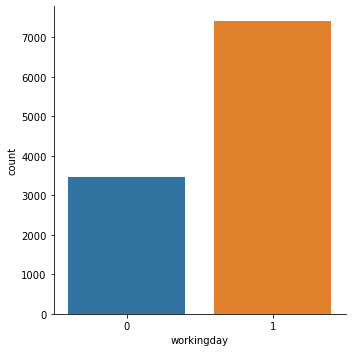

In [10]:
sns.factorplot(x='workingday',data=df,kind='count')

Majority of bike are rented on working day

In [11]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


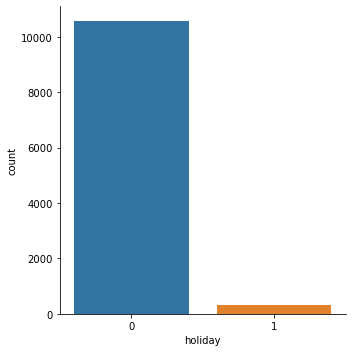

In [12]:
sns.factorplot(x='holiday',data=df,kind='count')

Majority of Bikes are rented on non-holiday

In [13]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


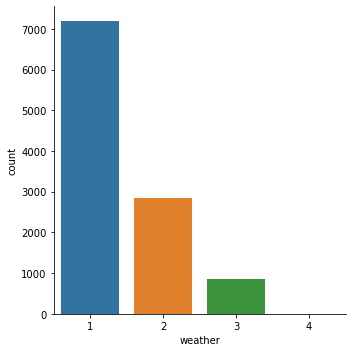

In [14]:
sns.factorplot(x='weather',data=df,kind='count')

In [15]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [16]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


We will visualize this using boxplot also

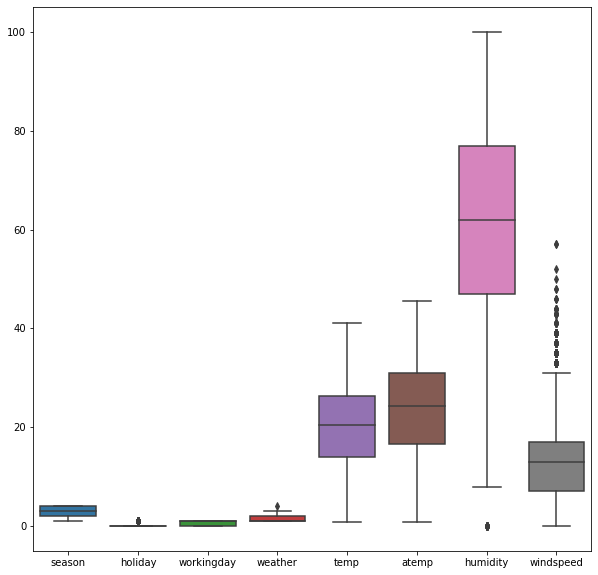

In [17]:
sns.boxplot(data=df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])
fig=plt.gcf()#get currect figure
fig.set_size_inches(10,10)

Now we will see all the continuous values of continuous features like temp,atemp,casual,registered,humidity,windspeed

In [18]:
df.temp.unique()#continuous variable

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

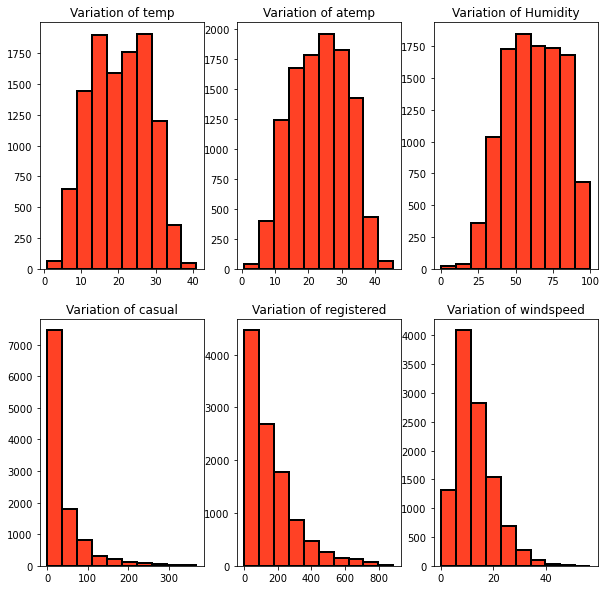

In [19]:
fig,axes=plt.subplots(2,3)
axes[0,0].hist(x='temp',data=df,edgecolor="black",linewidth=2,color='#ff4125')#linewidthis the width of edge
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x='atemp',data=df,edgecolor="black",linewidth=2,color='#ff4125')

axes[0,1].set_title("Variation of atemp")
axes[0,2].hist(x='humidity',data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,2].set_title("Variation of Humidity")
axes[1,0].hist(x='casual',data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of casual")
axes[1,1].hist(x='registered',data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of registered")
axes[1,2].hist(x='windspeed',data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,2].set_title("Variation of windspeed")
fig=plt.gcf()
fig.set_size_inches(10,10)

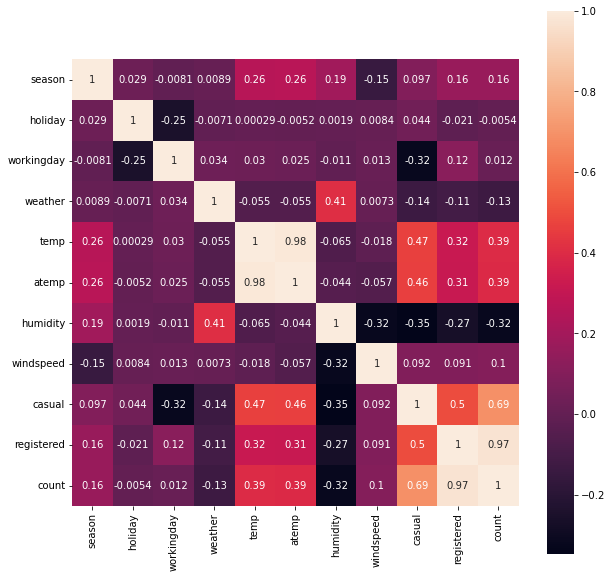

In [20]:
#correlation matrix
df_hm=df[:].corr()
sns.heatmap(data=df_hm,square=True,annot=True,cbar=True)
fig=plt.gcf()
fig.set_size_inches(10,10)

from these graph we can conclude following:
1. atemp and temp is highly correlated which can be seen from data also
2. casual\registered are only took the bike on rent, so they are highly correlated wih count.
3. On holiday the bike rented is less
4. On non worikngday the bike rented is less
5. Humidity,windspeed is inversely proporsional to the no of bike rented.
6. self relation is highest as expected 

In [21]:
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [22]:
season_new=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season_new],axis=1)
df.head()
season_test=pd.get_dummies(test_data['season'],prefix='season')
test_data=pd.concat([test_data,season_test],axis=1)
test_data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [23]:
df=df.drop(['season'],axis=1)
df.head()
test_data=test_data.drop(['season'],axis=1)
test_data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [24]:
weather_new=pd.get_dummies(df['weather'],prefix='season')
df=pd.concat([df,weather_new],axis=1)
df.head()
weather_test=pd.get_dummies(test_data['weather'],prefix='weather')
test_data=pd.concat([test_data,weather_test],axis=1)
test_data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [25]:
df=df.drop(['weather'],axis=1)
df.head()
test_data=test_data.drop(['weather'],axis=1)
test_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


now most importantly split the date and time as the time of day is expected to effect the no of bikes. for eg at office hours like early mornning or evening one would expect a greater demand of rental bikes.

Now we can split datetime,it is also an important feature as in the office time like in the early morning or in the evening the demand for rental bike rises.

In [26]:
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df['year'].head()

0    0
1    0
2    0
3    0
4    0
Name: year, dtype: int64

In [27]:
df['hour'] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df['month'] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['day'] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]

In [28]:
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,season_1,season_2,season_3,season_4,year,hour,month,day
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,0,1,5
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,0,1,1,5
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,0,2,1,5
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,0,3,1,5
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,0,4,1,5


In [29]:
test_data['year'] = [t.year for t in pd.DatetimeIndex(test_data.datetime)]
test_data['year'] = test_data['year'].map({2011:0, 2012:1})
test_data['hour'] = [t.hour for t in pd.DatetimeIndex(test_data.datetime)]
test_data['month'] = [t.month for t in pd.DatetimeIndex(test_data.datetime)]
test_data['day'] = [t.dayofweek for t in pd.DatetimeIndex(test_data.datetime)]
test_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,hour,month,day
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,0,1,3
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,0,1,1,3
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,0,2,1,3
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,0,3,1,3
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,0,4,1,3


In [30]:
df.drop(['datetime'],axis=1,inplace=True)
test_data.drop(['datetime'],axis=1,inplace=True)

Text(0.5, 1.0, 'Relation between feature')

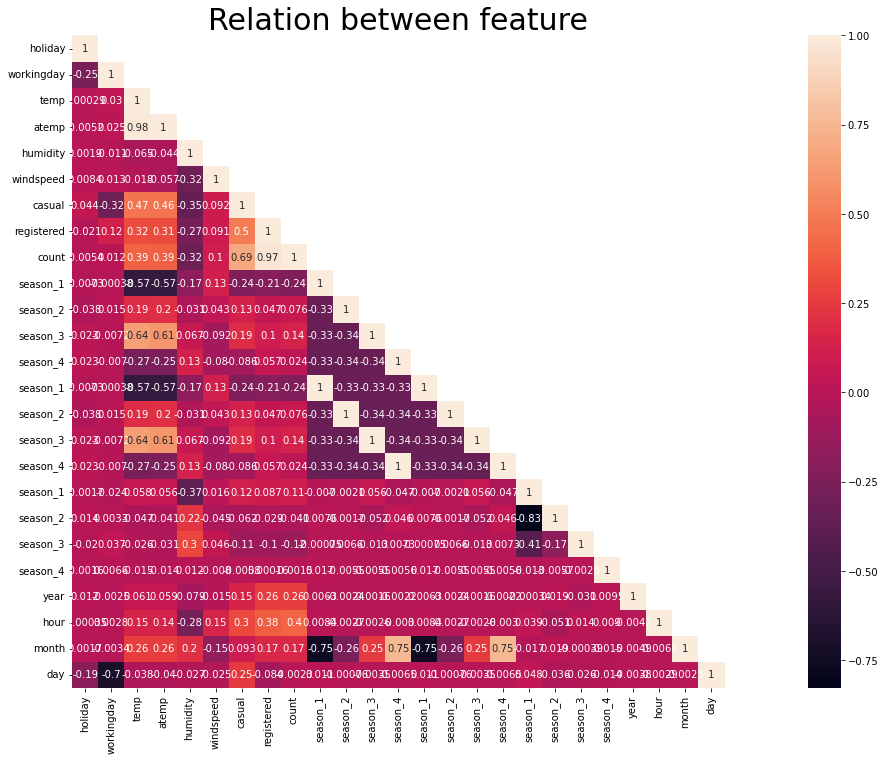

In [31]:
df_cor=df[:].corr()
mask = np.array(df_cor)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=df_cor,mask=mask,square=True,annot=True,cbar=True)
plt.title("Relation between feature",fontsize=30)

In [32]:
## as all the data is either casual or registered 
df.drop(['casual','registered'],axis=1,inplace=True)

Now we will how hourly bike rented how it is related

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


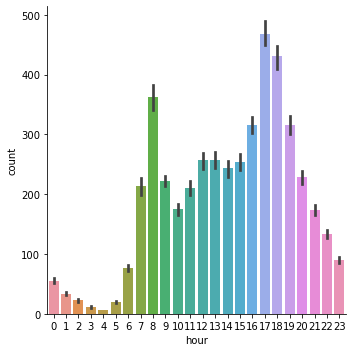

In [33]:
    sns.factorplot(x='hour',y='count',data=df,kind='bar',size=5)

Here we saw customers rented bike in the early morning and at evening (at the office time)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


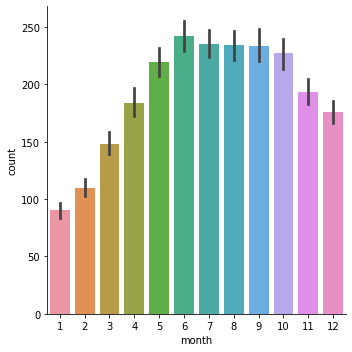

In [34]:
sns.factorplot(x='month',y='count',data=df,kind='bar',size=5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


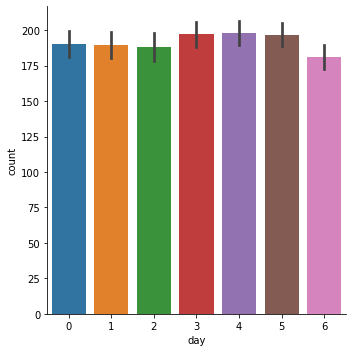

In [35]:
sns.factorplot(x='day',y='count',data=df,kind='bar',size=5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


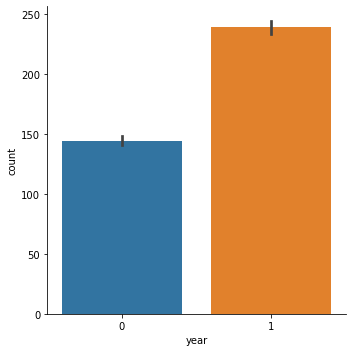

In [36]:
sns.factorplot(x='year',y='count',data=df,kind='bar',size=5)

<AxesSubplot:xlabel='temp', ylabel='count'>

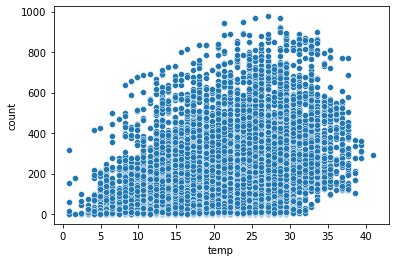

In [37]:
sns.scatterplot(x='temp',y='count',data=df)

For continuous values we cannont determine which slot is better and how is it proportinal to count so we will convert it in some bin

In [38]:
new_df=df.copy()
new_df['temp']=df['temp'].copy()
new_df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [39]:
new_df['temp']=np.floor(new_df['temp'])//5
new_df['temp'].unique()

array([1., 2., 3., 0., 4., 5., 6., 7., 8.])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


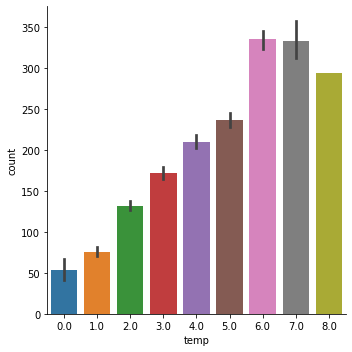

In [40]:
sns.factorplot(x="temp",y="count",data=new_df,kind='bar')

In [41]:
# def normalize(df):
#     result = df.copy()
#     for feature_name in df.columns:
#         max_value = df[feature_name].max()
#         min_value = df[feature_name].min()
#         result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#     return result
# df=normalize(df)
# from sklearn.preprocessing import minmax_scale
# minmax_scale(df,feature_range=(0,1))

In [42]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,...,season_3,season_4,season_1,season_2,season_3,season_4,year,hour,month,day
0,0,0,9.84,14.395,81,0.0,16,1,0,0,...,0,0,1,0,0,0,0,0,1,5
1,0,0,9.02,13.635,80,0.0,40,1,0,0,...,0,0,1,0,0,0,0,1,1,5
2,0,0,9.02,13.635,80,0.0,32,1,0,0,...,0,0,1,0,0,0,0,2,1,5
3,0,0,9.84,14.395,75,0.0,13,1,0,0,...,0,0,1,0,0,0,0,3,1,5
4,0,0,9.84,14.395,75,0.0,1,1,0,0,...,0,0,1,0,0,0,0,4,1,5


Now we will use different Algorithm to train the model and predict the output 

In [43]:
from sklearn.model_selection import train_test_split
X=df.drop(['count'],axis=1)
Y=df['count']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
Y_pred=lr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))
r2_score(Y_test,Y_pred)

143.94166071162215


0.39240116038853845

As we can see with Linear regressor the accuracy score is too less and also the error is more so we can try to train the model with better regressor algo

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [47]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

r2_sc=[]
mse=[]
d={}
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
for i in range(len(models)):
    clf=models[i]
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    mse.append(np.sqrt(mean_squared_error(Y_test,Y_pred)))
    score=r2_score(Y_test,Y_pred)
    r2_sc.append(score)


In [48]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        return result
df=normalize(df)
from sklearn.preprocessing import minmax_scale
minmax_scale(df,feature_range=(0,1))

array([[0.        , 0.        , 0.2244898 , ..., 0.        , 0.        ,
        0.83333333],
       [0.        , 0.        , 0.20408163, ..., 0.04347826, 0.        ,
        0.83333333],
       [0.        , 0.        , 0.20408163, ..., 0.08695652, 0.        ,
        0.83333333],
       ...,
       [0.        , 1.        , 0.32653061, ..., 0.91304348, 1.        ,
        0.33333333],
       [0.        , 1.        , 0.32653061, ..., 0.95652174, 1.        ,
        0.33333333],
       [0.        , 1.        , 0.30612245, ..., 1.        , 1.        ,
        0.33333333]])

In [49]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

r2_sc=[]
mse=[]
d={}
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
for i in range(len(models)):
    clf=models[i]
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    mse.append(np.sqrt(mean_squared_error(Y_test,Y_pred)))
    score=r2_score(Y_test,Y_pred)
    r2_sc.append(score)

In [50]:
model_name=['RandomForestRegressor()','AdaBoostRegressor()','BaggingRegressor()','SVR()','KNeighborsRegressor()']
d={'Model':model_name,'rmsle':mse,'r2_score':r2_sc}

In [51]:
d=pd.DataFrame(d)

In [52]:
d

,Model,rmsle,r2_score
0,RandomForestRegressor(),38.267748,0.955372
1,AdaBoostRegressor(),105.377742,0.661594
2,BaggingRegressor(),41.952440,0.946364
3,SVR(),157.842416,0.240745
4,KNeighborsRegressor(),117.821491,0.576952


  We can see from this that RandomForestRegressor is having best r2_score and less root mean squared log error

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


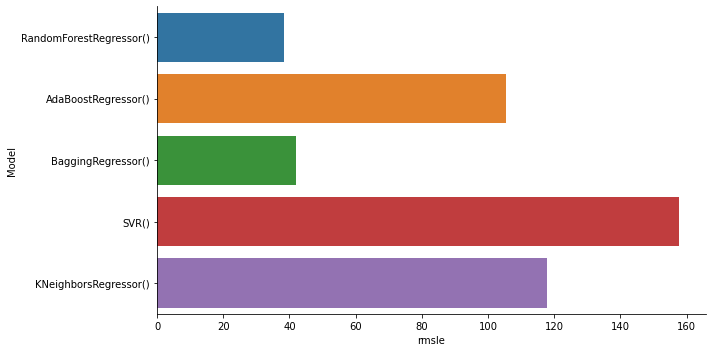

In [53]:
sns.factorplot(y='Model',x='rmsle',data=d,kind='bar',size=5,aspect=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


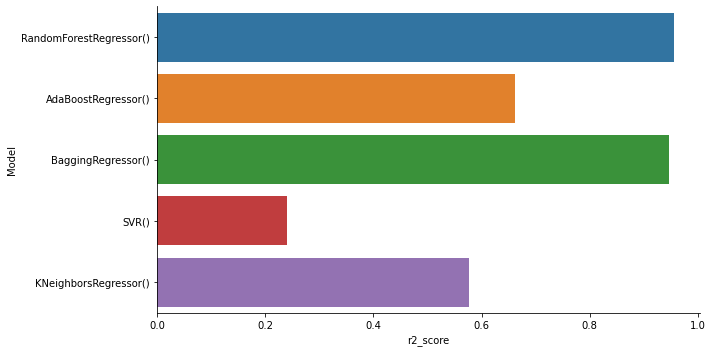

In [54]:
sns.factorplot(y='Model',x='r2_score',data=d,kind='bar',size=5,aspect=2)